# Importing Libraires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats 
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
train_df= pd.read_csv(r"C:\Users\m\Desktop\csv files\Project-Housing_splitted\train.csv") 
test_df= pd.read_csv(r"C:\Users\m\Desktop\csv files\Project-Housing_splitted\test.csv") 

In [3]:
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000


In [4]:
test_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml


# Checking Shape of Data

In [5]:
(train_df.shape),(test_df.shape)

((1168, 81), (292, 80))

# Checking for Duplicate Values

In [6]:
train_df.duplicated().sum(),test_df.duplicated().sum()

(0, 0)

# Merging Data

In [7]:
df = train_df.append(test_df,sort=False)

In [8]:
df.shape

(1460, 81)

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0


# Checking Information about the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

- Columns has missing values
- 4 columns are of float type,34 columns are of int type & 43 are of object  type.  

# Checking for null values

In [11]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

from above code we get to know that some columns has some amount of missing values. let's make it more clear by checking the percentage of missing values.

In [12]:
round(df.isnull().mean()*100),2

(Id                 0.0
 MSSubClass         0.0
 MSZoning           0.0
 LotFrontage       18.0
 LotArea            0.0
 Street             0.0
 Alley             94.0
 LotShape           0.0
 LandContour        0.0
 Utilities          0.0
 LotConfig          0.0
 LandSlope          0.0
 Neighborhood       0.0
 Condition1         0.0
 Condition2         0.0
 BldgType           0.0
 HouseStyle         0.0
 OverallQual        0.0
 OverallCond        0.0
 YearBuilt          0.0
 YearRemodAdd       0.0
 RoofStyle          0.0
 RoofMatl           0.0
 Exterior1st        0.0
 Exterior2nd        0.0
 MasVnrType         1.0
 MasVnrArea         1.0
 ExterQual          0.0
 ExterCond          0.0
 Foundation         0.0
 BsmtQual           3.0
 BsmtCond           3.0
 BsmtExposure       3.0
 BsmtFinType1       3.0
 BsmtFinSF1         0.0
 BsmtFinType2       3.0
 BsmtFinSF2         0.0
 BsmtUnfSF          0.0
 TotalBsmtSF        0.0
 Heating            0.0
 HeatingQC          0.0
 CentralAir     

- PoolQC columns contains 100 % missing values.
- Alley columns contains 94 % missing values
- Fence columns contains 81 % missing values
- MiscFeature  contains 96 % missing values <br>
The percentage of missing values in these columns are vary high hence we have to drop them from our data.

In [13]:
df.drop(columns=["PoolQC","Alley","Fence","MiscFeature"],axis=1,inplace=True)

In [14]:
df.shape

(1460, 77)

# Checking Mathematical Aspects

In [15]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,181477.005993
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Lets check the ID column.

In [16]:
df["Id"].nunique()

1460

Since Id column has all the unique values we can drop Id column.

In [17]:
df.drop('Id',axis=1,inplace=True)

Lets check LotFrontage column.

# Saperating Numerical & categorical columns

In [18]:
num_var = df.select_dtypes(include = [np.number])
cat_var = df.select_dtypes(exclude = [np.number])

In [19]:
num_var.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [20]:
cat_var.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
num = []
for i in num_var.columns:
    if num_var[i].isnull().sum()>0:
        num.append(i)
        
cat = []
for i in cat_var.columns:
    if cat_var[i].isnull().sum()>0:
        cat.append(i)        

In [22]:
print(num)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']


In [23]:
print(cat)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


Imputing missing values by mode value for numerical variables

In [24]:
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mode()[0])
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mode()[0])
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].mode()[0])

In [25]:
print(cat)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


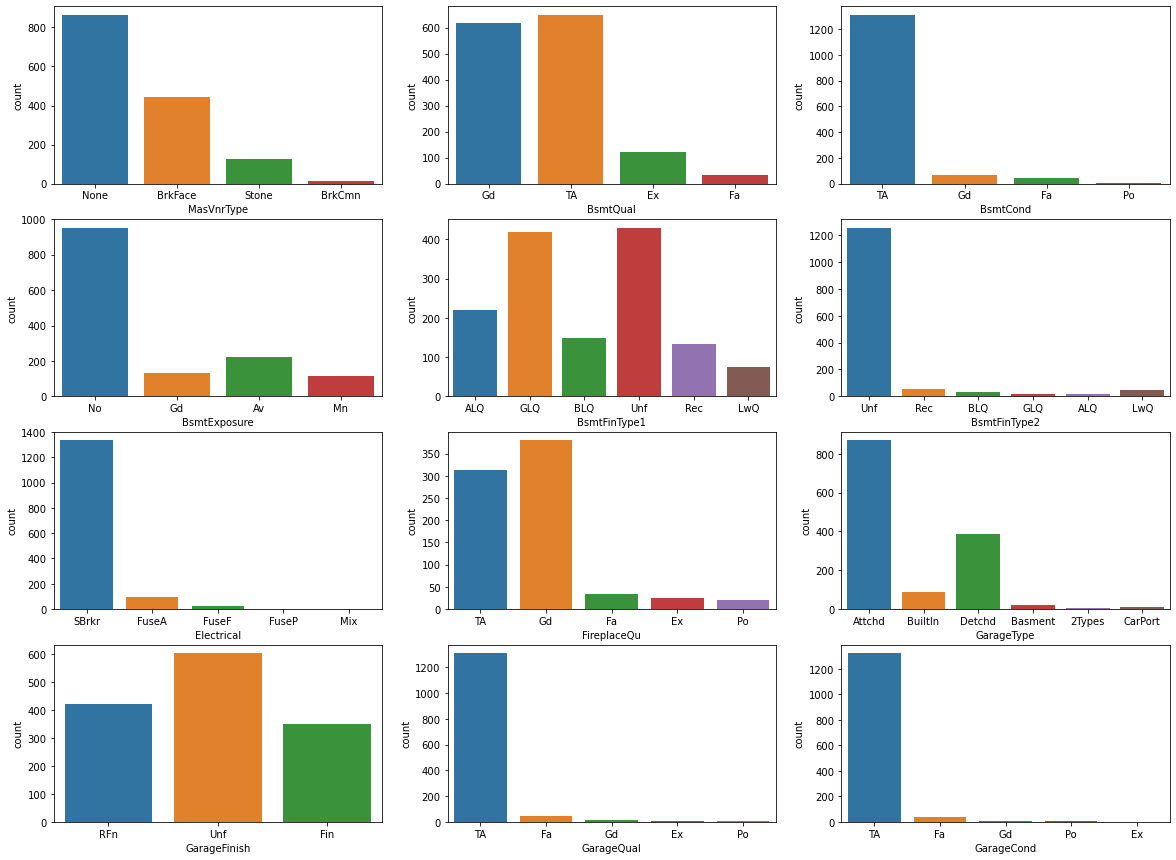

In [26]:
plt.figure(figsize=(20,15))
for i,j in enumerate(cat):
    plt.subplot(4,3,i+1)
    sns.countplot(df[j])
plt.show()    

In [27]:
fillwithmode=['MasVnrType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageQual', 'GarageCond']
for i in fillwithmode:
    df[i] = df[i].fillna(df[i].mode()[0])

In [28]:
remcat=[]
for i in cat:
    if i not in fillwithmode:
        remcat.append(i)
remcat        

['BsmtQual', 'BsmtFinType1', 'FireplaceQu', 'GarageFinish']

In [29]:
for i in remcat:
    df[i] = df[i].fillna("Missing")

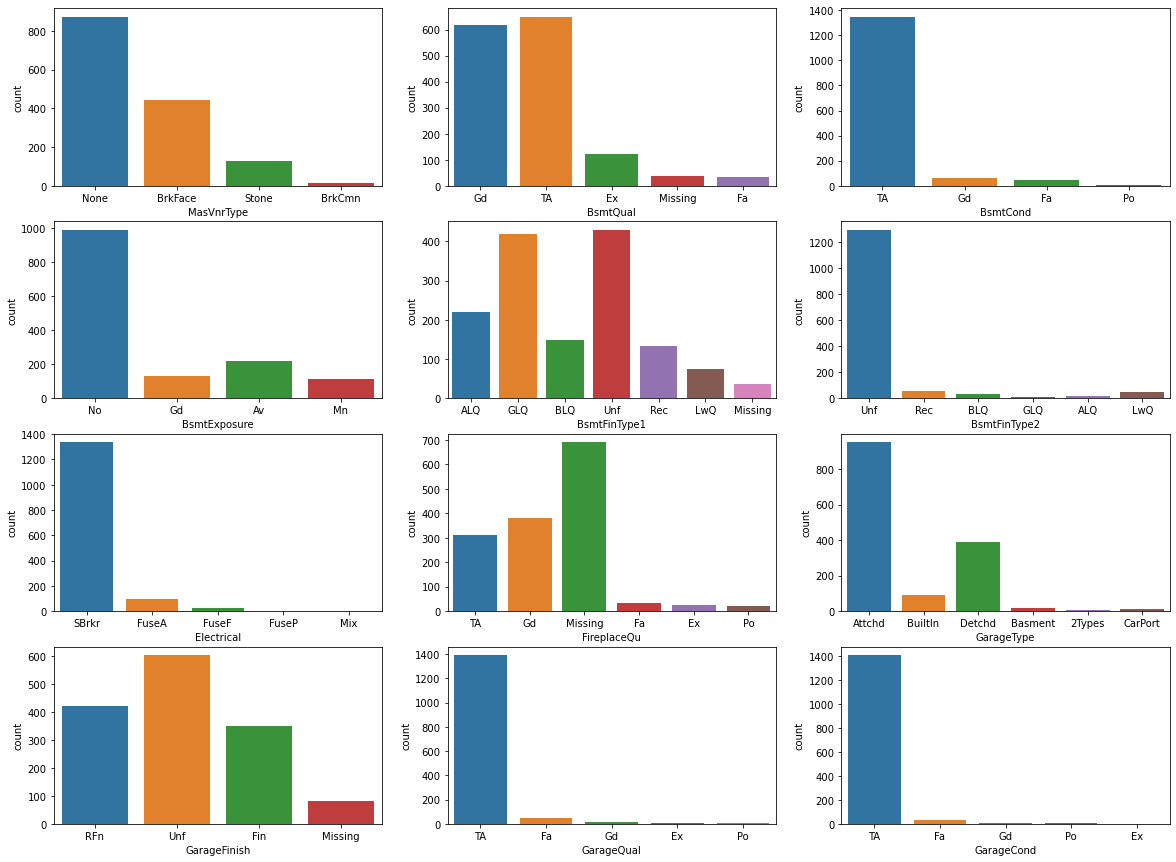

In [30]:
plt.figure(figsize=(20,15))
for i,j in enumerate(cat):
    plt.subplot(4,3,i+1)
    sns.countplot(df[j])
plt.show()   

# Now lets check the null values  present in our data

In [31]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

Now we can observer that we successfully imputed the missing values in our data

In [32]:
df.shape

(1460, 76)

In [33]:
numerical=[]
categorical=[]
for i in df.columns[0:-1]:
    if df[i].dtype == "object":
        categorical.append(i)
    else:
        numerical.append(i)    

In [34]:
print("There are ",len(numerical),"numerical columns in our data.")
print("There are ",len(categorical),"categorical columns in our data.")

There are  36 numerical columns in our data.
There are  39 categorical columns in our data.


In [35]:
year_colm=[]
for i in numerical:
    if  ('Year' in i) or (('Yr' in i)):
        year_colm.append(i)
year_colm        

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [36]:
columns_with_less_values=[]
for i in numerical:
    if (len(df[i].unique())<25) and (i not in year_colm):
        columns_with_less_values.append(i)
columns_with_less_values        

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [37]:
continuous_values=[]
for i in numerical:
    if (i not in columns_with_less_values) and (i not in year_colm):
        continuous_values.append(i)       
continuous_values        

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

# Now let's Analyse the Data Visually

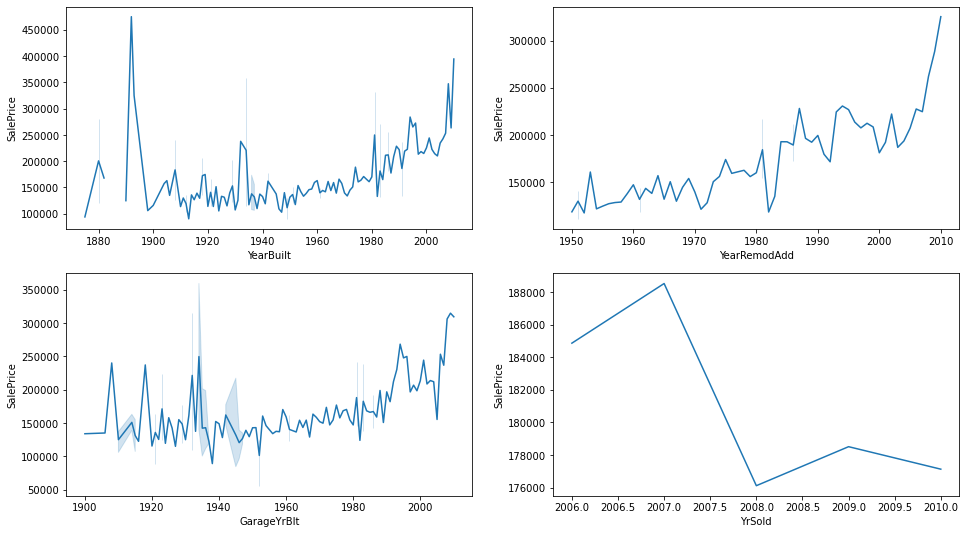

In [38]:
plt.figure(figsize=(16,9))
for i,j in enumerate(year_colm):
    plt.subplot(2,2,i+1)
    sns.lineplot(df[j],df["SalePrice"])
plt.show()    

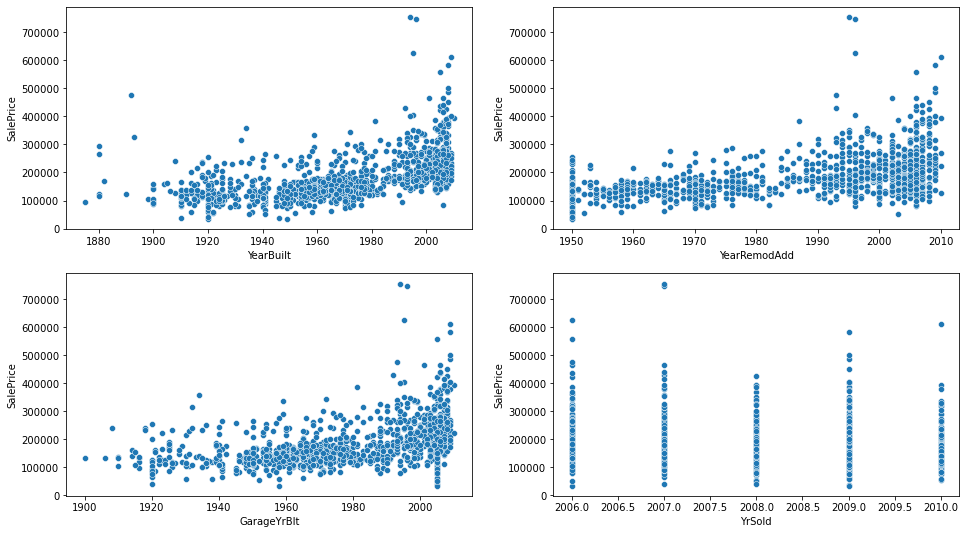

In [39]:
plt.figure(figsize=(16,9))
for i,j in enumerate(year_colm):
    plt.subplot(2,2,i+1)
    sns.scatterplot(df[j],df["SalePrice"])
plt.show()

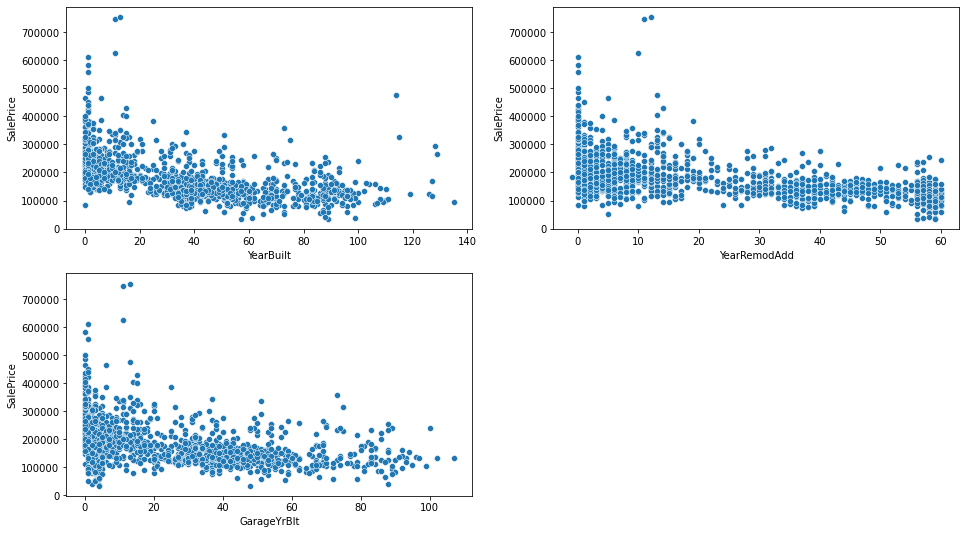

In [40]:
plt.figure(figsize=(16,9))
for i,j in enumerate(year_colm[0:-1]):
    plt.subplot(2,2,i+1)
    sns.scatterplot(df['YrSold'] - df[j] , df['SalePrice'])
    plt.xlabel(j)
plt.show()

From the above observations we can observed that if house is new the prices are high . As the year increases the price of houses getting low

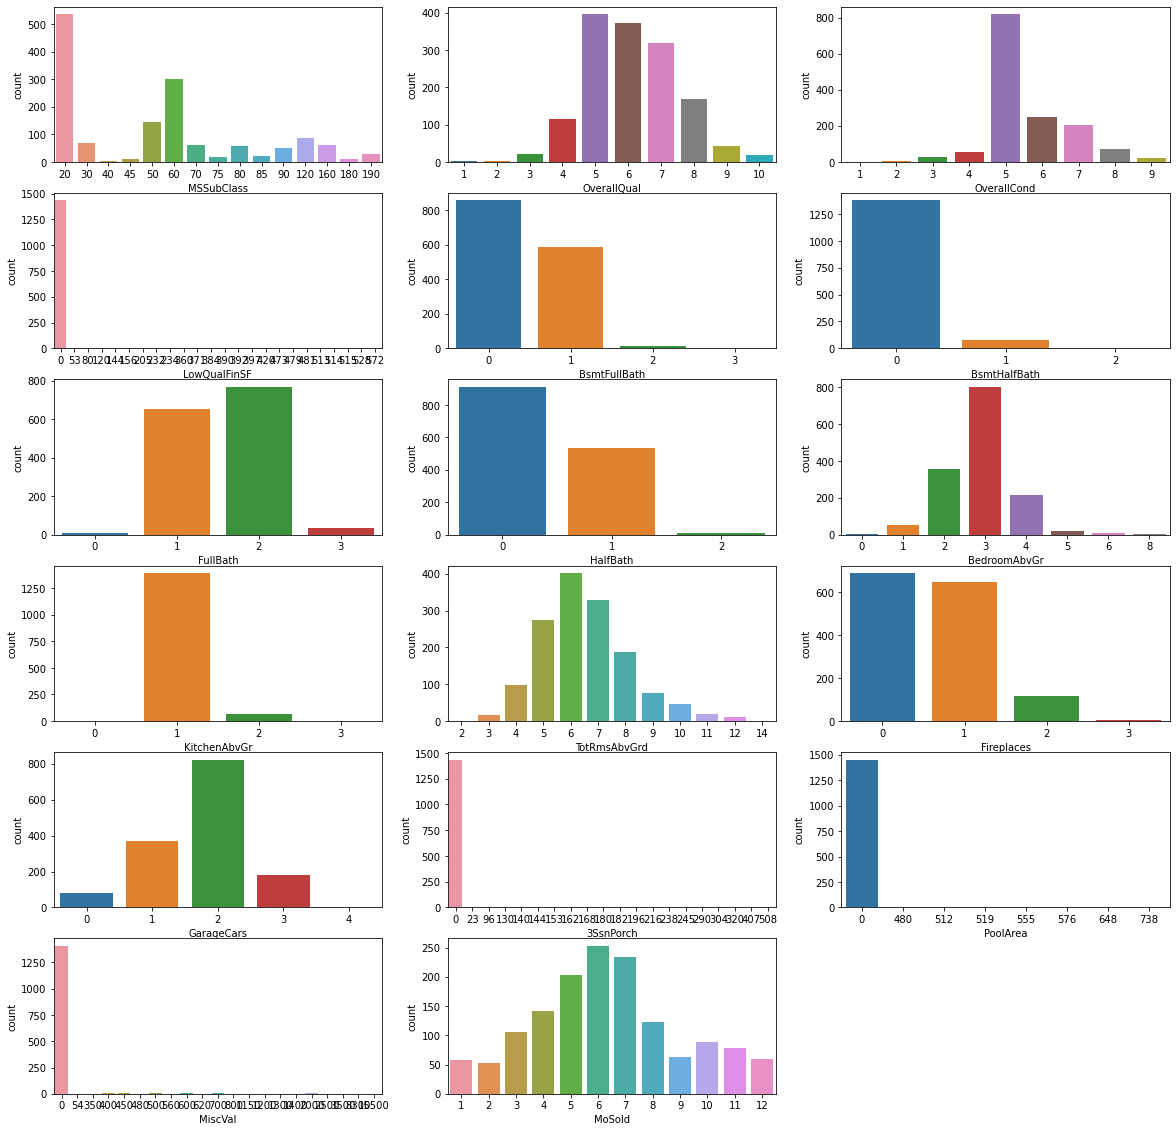

In [41]:
plt.figure(figsize=(20,20))
for i,j in enumerate(columns_with_less_values):
    plt.subplot(6,3,i+1)
    sns.countplot(df[j])
    plt.xlabel(j)
plt.show()

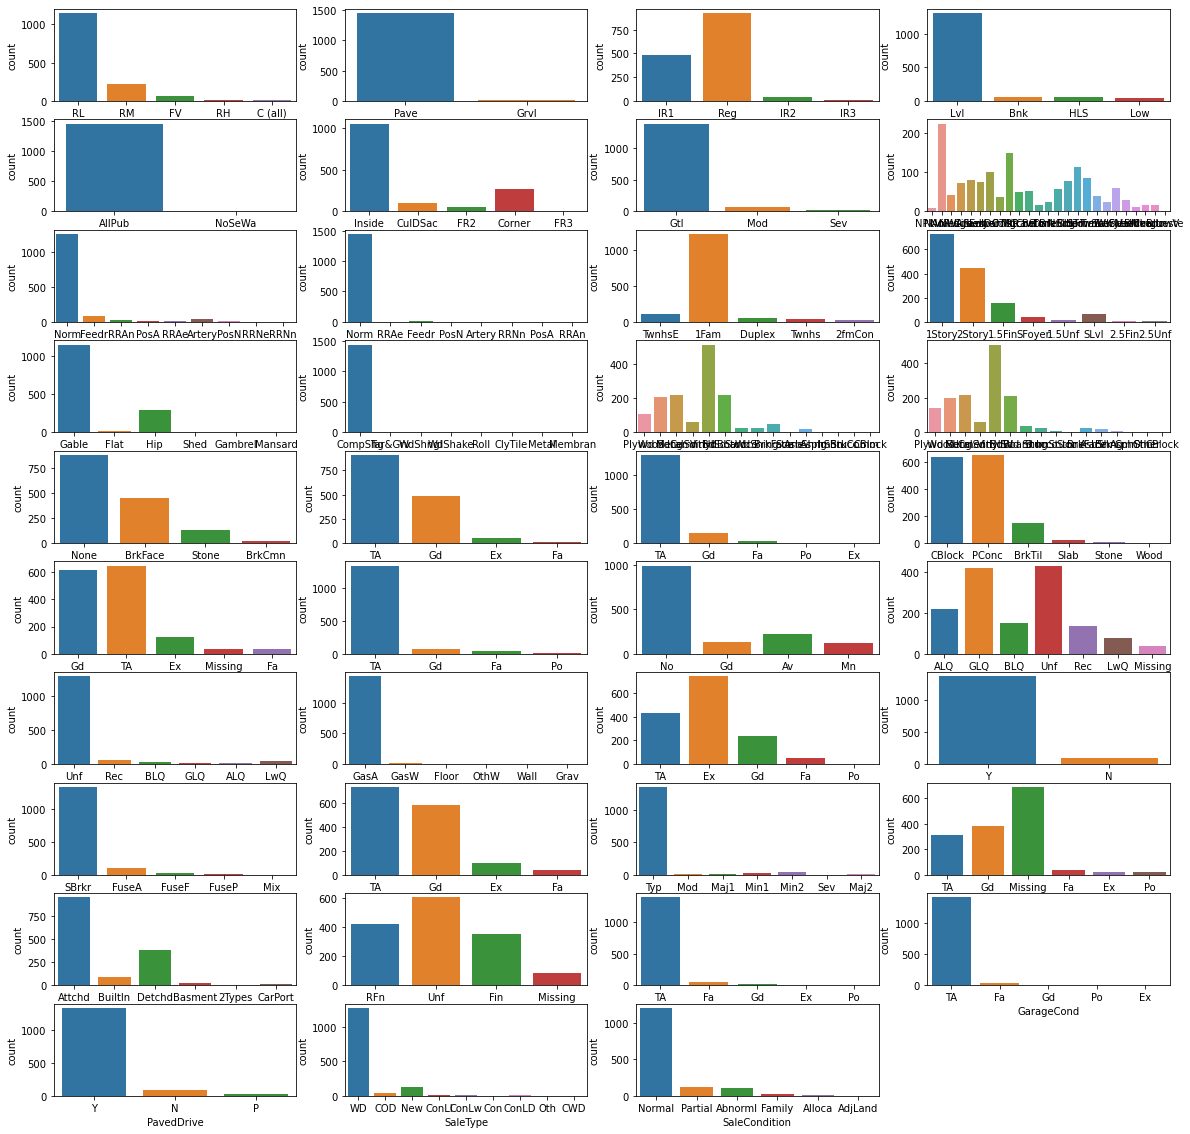

In [42]:
plt.figure(figsize=(20,20))
for i,j in enumerate(categorical):
    plt.subplot(10,4,i+1)
    sns.countplot(df[j])
    plt.xlabel(j)
plt.show()

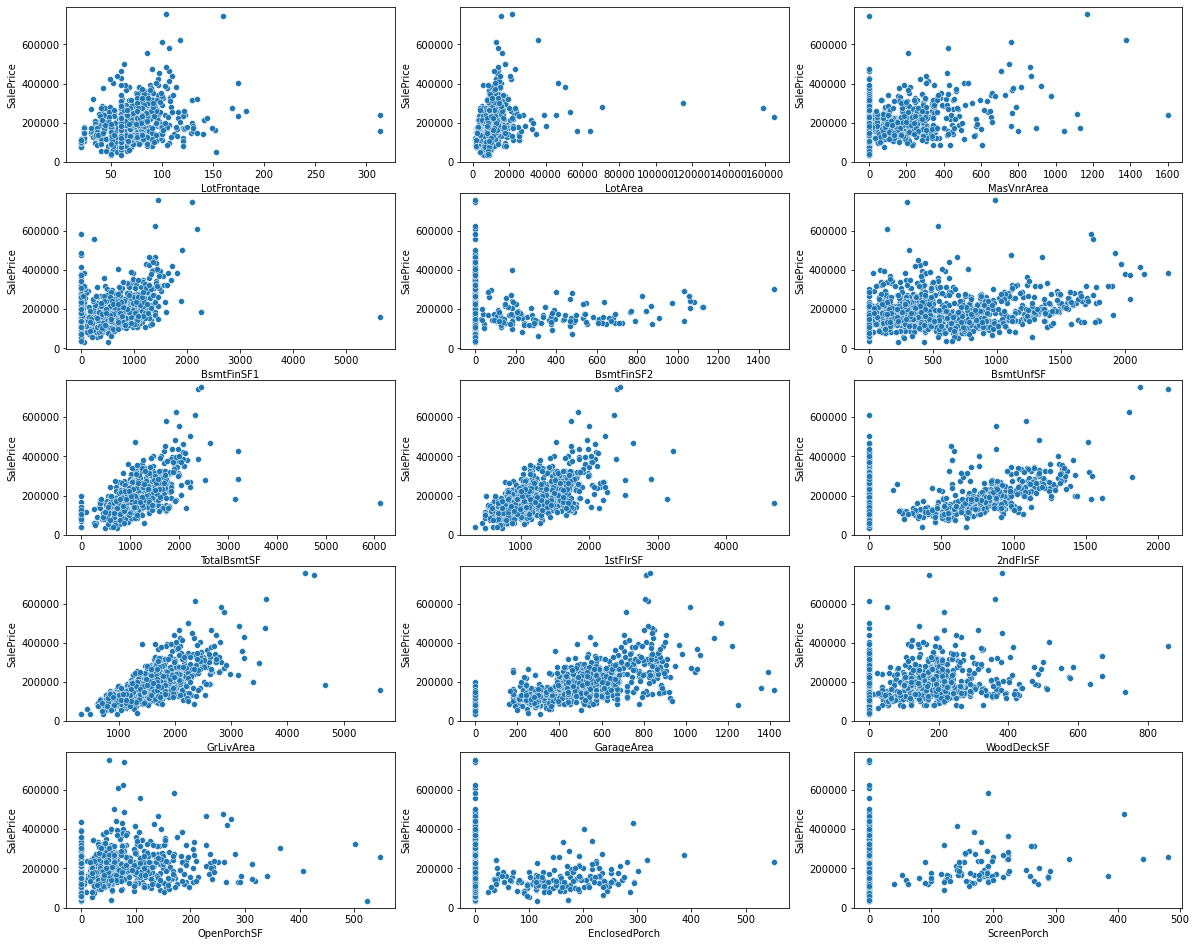

In [43]:
plt.figure(figsize=(20,20))
for i,j in enumerate(continuous_values):
    plt.subplot(6,3,i+1)
    sns.scatterplot(df[j],df["SalePrice"])
    plt.xlabel(j)
plt.show()

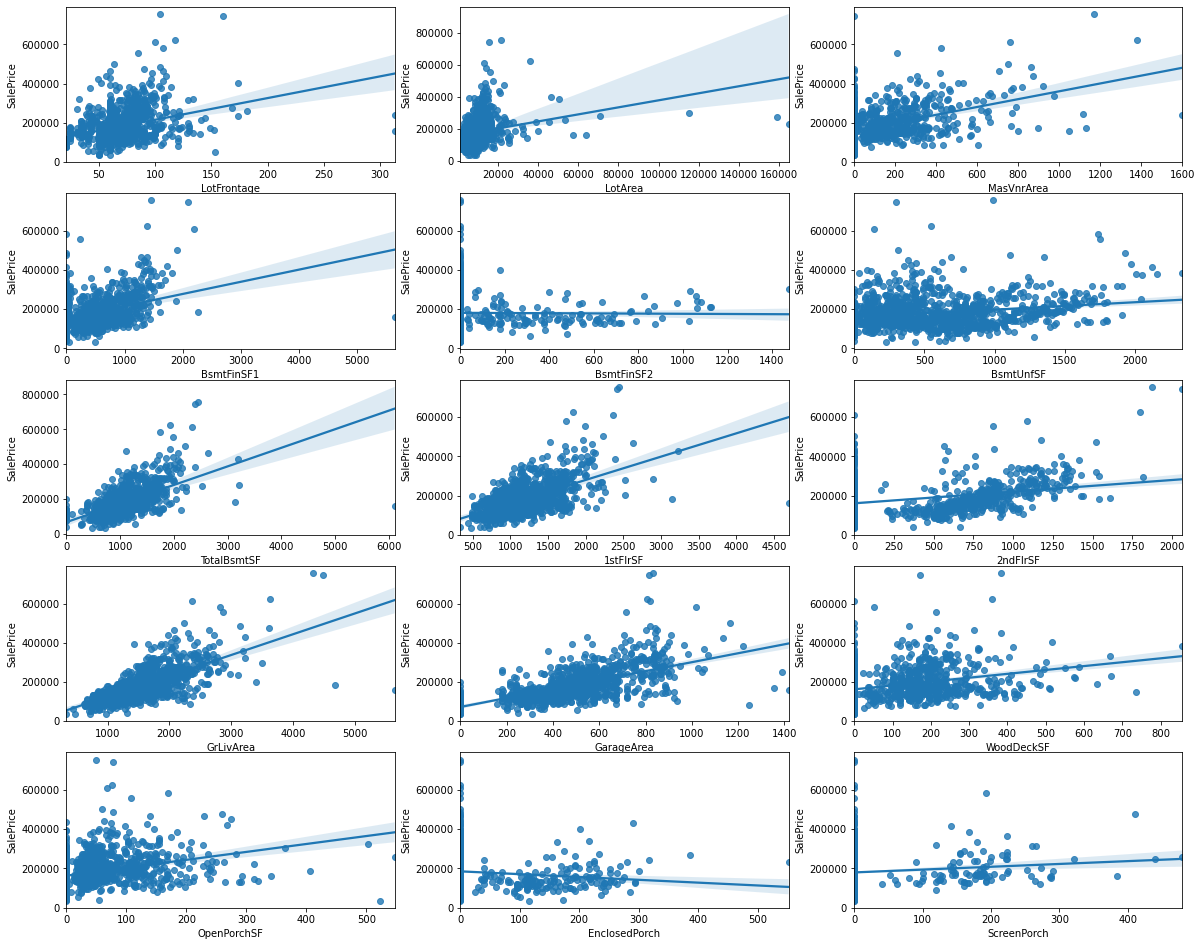

In [44]:
plt.figure(figsize=(20,20))
for i,j in enumerate(continuous_values):
    plt.subplot(6,3,i+1)
    sns.regplot(df[j],df["SalePrice"])
    plt.xlabel(j)
plt.show()

# Checking Distribution

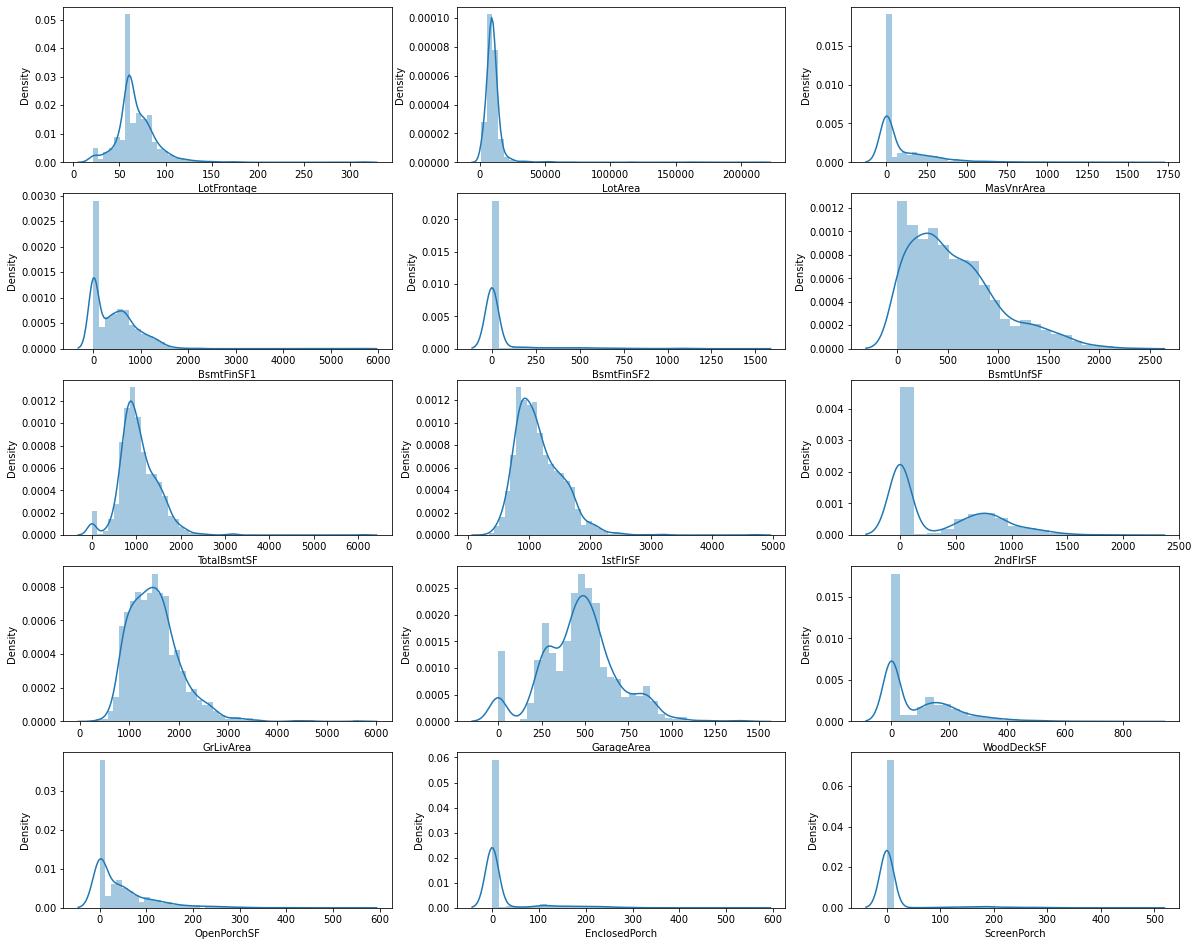

In [45]:
plt.figure(figsize=(20,20))
for i,j in enumerate(continuous_values):
    plt.subplot(6,3,i+1)
    sns.distplot(df[j])
    plt.xlabel(j)
plt.show()    

# Checking For Outliers

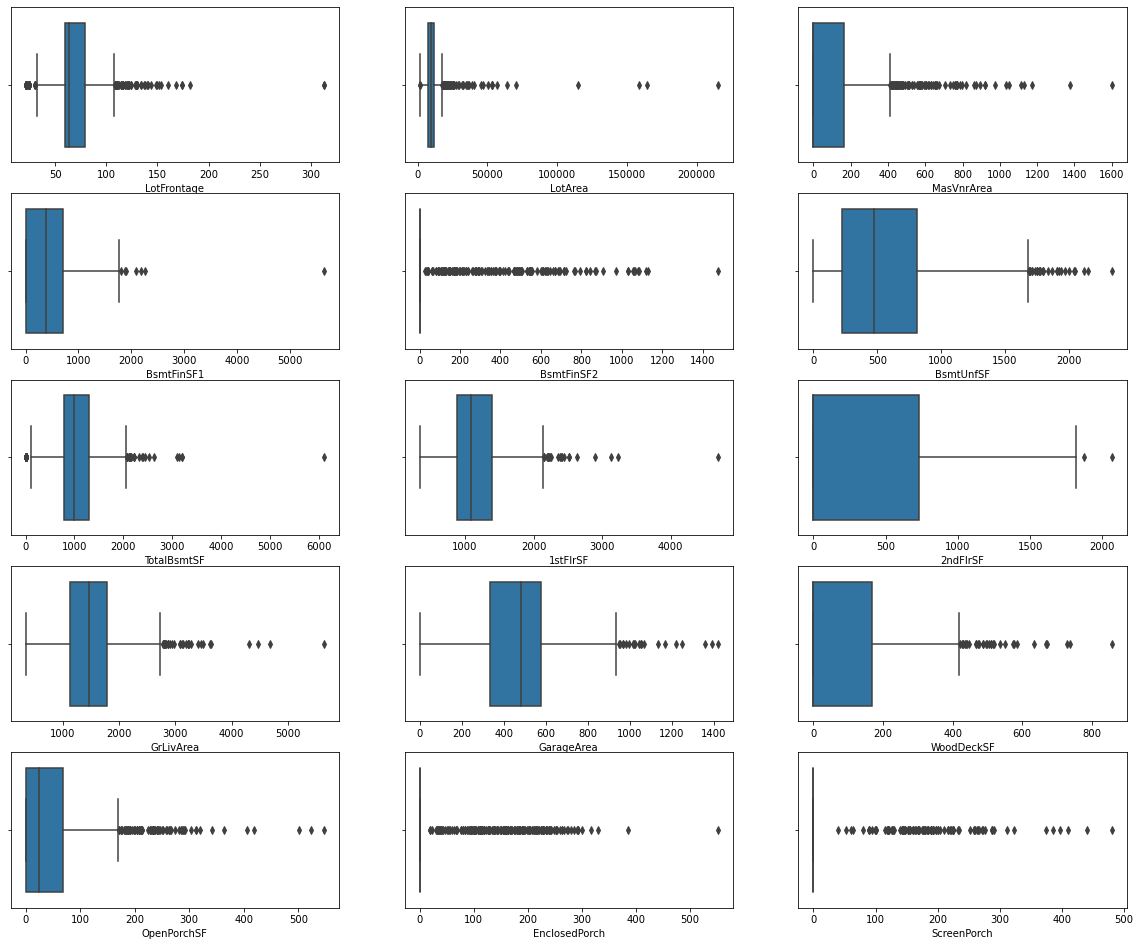

In [46]:
plt.figure(figsize=(20,20))
for i,j in enumerate(continuous_values):
    plt.subplot(6,3,i+1)
    sns.boxplot(df[j])
    plt.xlabel(j)
plt.show()    

In [47]:
l=['LotFrontage','LotArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']
for i in l:
    IQR = df[i].quantile(.75) - df[i].quantile(.25) 
    upper = df[i].quantile(.75) + 1.5 * IQR
    lower = df[i].quantile(.25) - 1.5 * IQR
    df[i] = np.where(df[i]>upper,upper , np.where(df[i]<lower,lower,df[i]))

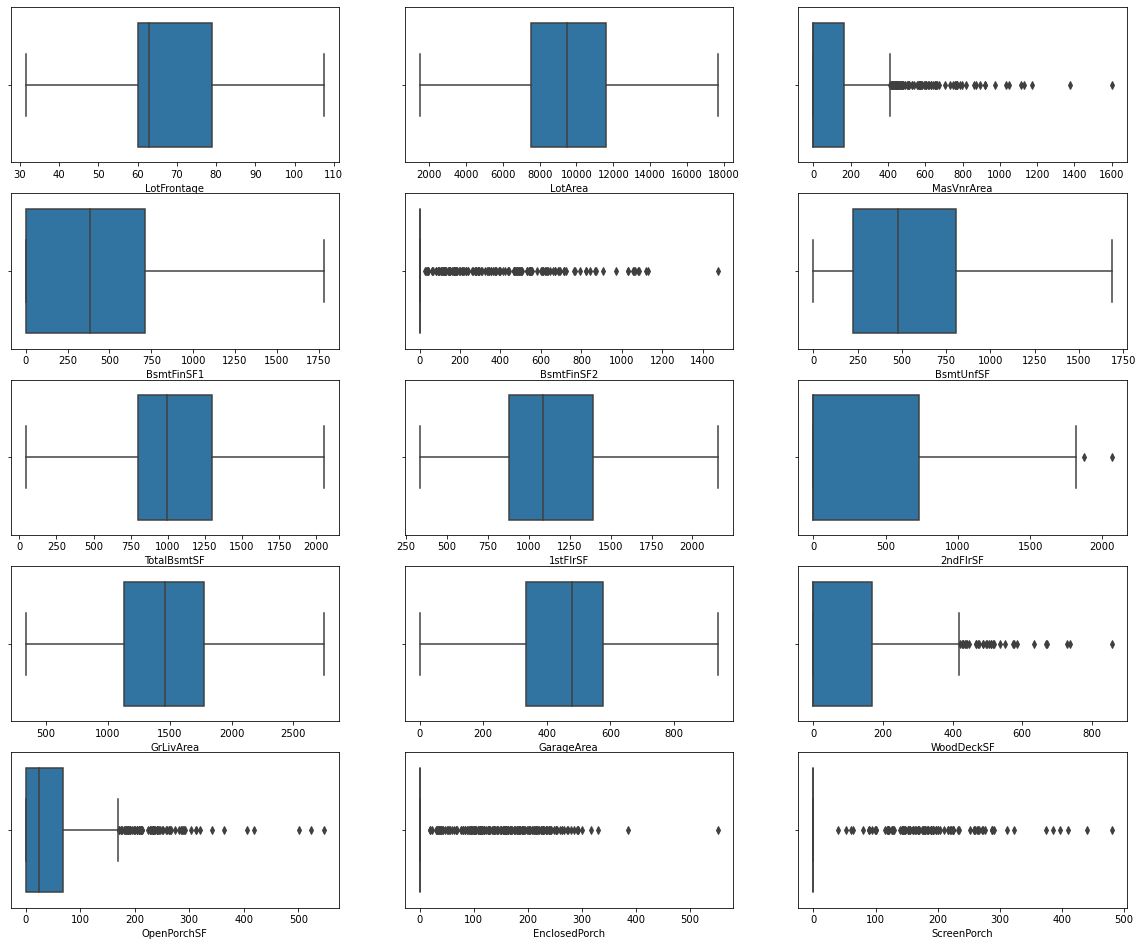

In [48]:
plt.figure(figsize=(20,20))
for i,j in enumerate(continuous_values):
    plt.subplot(6,3,i+1)
    sns.boxplot(df[j])
    plt.xlabel(j)
plt.show()   

In [49]:
df[l].skew()

LotFrontage    0.337944
LotArea        0.208492
BsmtFinSF1     0.739877
BsmtUnfSF      0.796931
TotalBsmtSF    0.237240
1stFlrSF       0.664134
GrLivArea      0.593556
GarageArea    -0.069685
dtype: float64

In [50]:
from scipy import stats
for i in l:
    if (df[i].skew()>.5 ) or (df[i].skew()< -0.5) :
        df[i],lamda = stats.yeojohnson(df[i]+0.0001)

In [51]:
df[l].skew()

LotFrontage    0.337944
LotArea        0.208492
BsmtFinSF1    -0.419018
BsmtUnfSF     -0.294084
TotalBsmtSF    0.237240
1stFlrSF      -0.002069
GrLivArea     -0.007095
GarageArea    -0.069685
dtype: float64

# Encoding the features

In [52]:
le = LabelEncoder()
for i in categorical:
    df[i]=le.fit_transform(df[i])    

In [53]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,60.0,4928.0,1,0,3,0,4,0,13,2,2,4,2,6,5,1976,1976,1,1,9,10,2,0.0,3,4,1,2,3,3,0,8.784444,5,0,53.879306,1078.0,1,4,1,4,8.703600,0,0,15.865307,0,0,2,0,2,1,3,5,6,1,5,1,1977.0,2,2,440.0,4,4,2,0,205,0,0,0,0,0,2,2007,8,4,128000.0
1,20,3,95.0,15865.0,1,0,3,0,4,1,12,2,2,0,2,8,6,1970,1970,0,5,13,14,2,0.0,2,2,2,4,1,1,0,12.456198,4,823,56.202842,2052.0,1,0,1,4,10.018223,0,0,19.957698,1,0,2,0,4,1,2,8,6,1,5,1,1970.0,3,2,621.0,4,4,2,81,207,0,0,224,0,0,10,2007,8,4,268000.0
2,60,3,92.0,9920.0,1,0,3,0,1,0,15,2,2,0,5,7,5,1996,1997,1,1,8,8,2,0.0,2,4,2,2,3,0,2,16.323285,5,0,27.642251,1117.0,1,0,1,4,8.961324,886,0,19.447923,1,0,2,1,3,1,3,8,6,1,5,1,1997.0,3,2,455.0,4,4,2,180,130,0,0,0,0,0,6,2007,8,4,269790.0
3,20,3,105.0,11751.0,1,0,3,0,4,0,14,2,2,0,2,6,6,1977,1977,3,1,9,10,1,480.0,3,4,1,2,3,3,1,15.386438,5,0,58.711457,1844.0,1,0,1,4,9.759826,0,0,18.994032,0,0,2,0,3,1,3,7,6,1,5,1,1977.0,2,2,546.0,4,4,2,0,122,0,0,0,0,0,1,2010,0,4,190000.0
4,20,3,60.0,16635.0,1,0,3,0,2,0,14,2,2,0,2,6,7,1977,2000,1,1,5,5,3,126.0,2,4,1,2,3,3,0,18.157746,5,0,32.776021,1602.0,1,2,1,4,9.528973,0,0,18.283702,0,1,2,0,3,1,2,8,6,1,5,1,1977.0,0,2,529.0,4,4,2,240,0,0,0,0,0,0,6,2009,8,4,215000.0


# Checking Correlation

<AxesSubplot:>

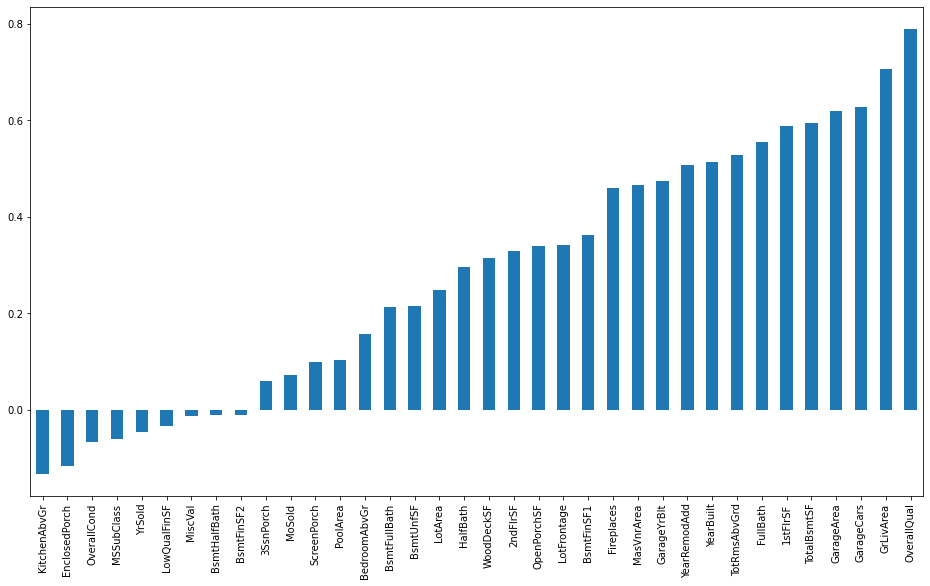

In [54]:
num_var.corr()["SalePrice"].drop(["SalePrice"]).sort_values().plot(kind="bar",figsize=(16,9))

<AxesSubplot:>

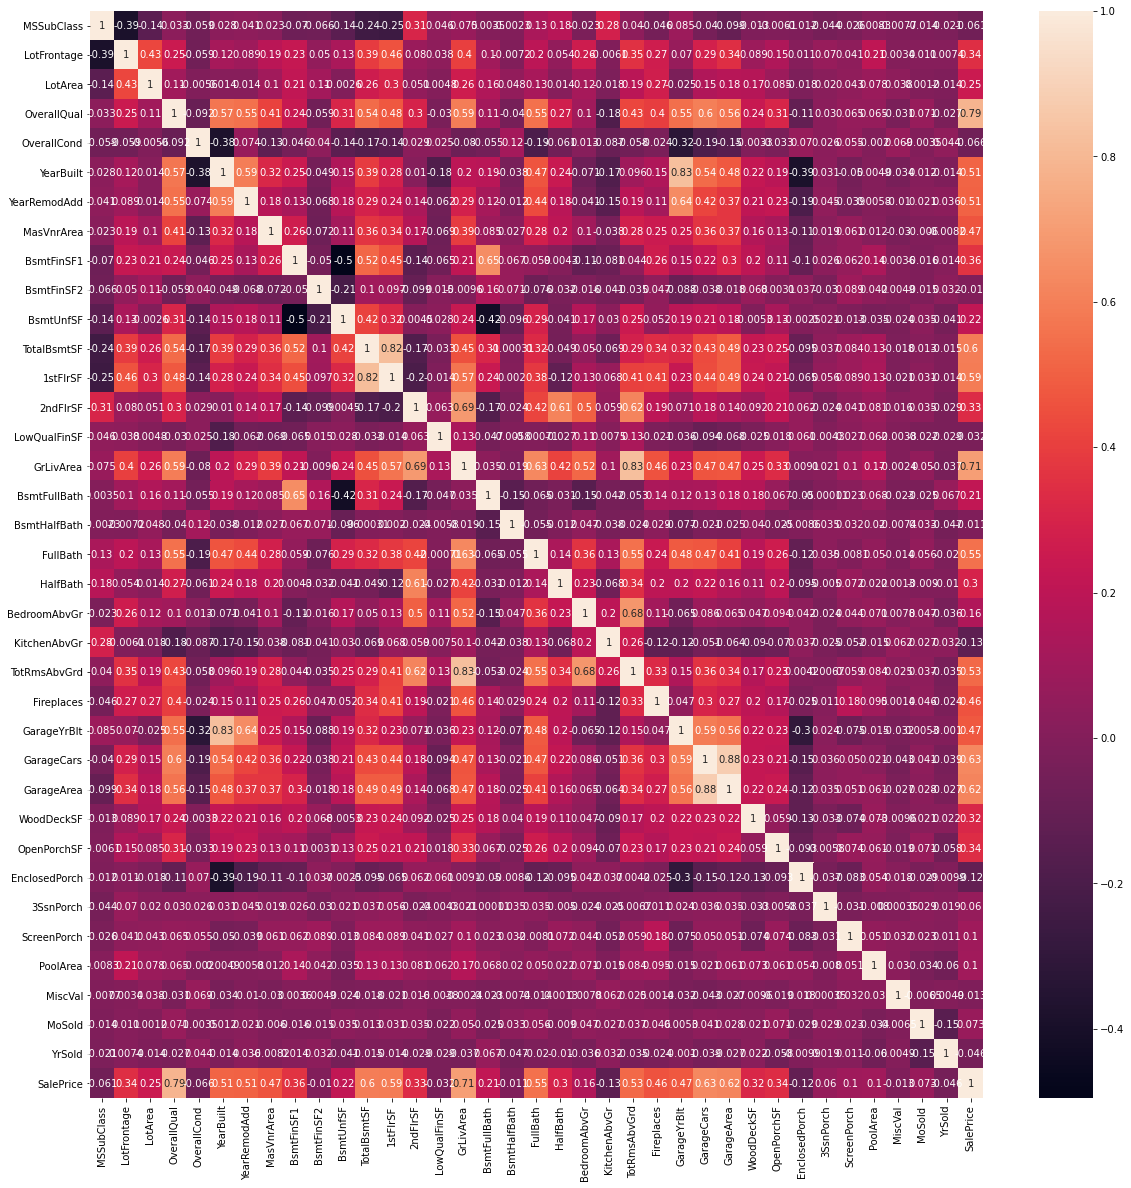

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(num_var.corr(),annot=True)

From the above heat map we can check that some of the columns like OveralllQual , YearBuilt,TotalBsment,GrlivArea,GaurageArea are positively correlated 

In [56]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,60.0,4928.0,1,0,3,0,4,0,13,2,2,4,2,6,5,1976,1976,1,1,9,10,2,0.0,3,4,1,2,3,3,0,8.784444,5,0,53.879306,1078.0,1,4,1,4,8.703600,0,0,15.865307,0,0,2,0,2,1,3,5,6,1,5,1,1977.0,2,2,440.0,4,4,2,0,205,0,0,0,0,0,2,2007,8,4,128000.0
1,20,3,95.0,15865.0,1,0,3,0,4,1,12,2,2,0,2,8,6,1970,1970,0,5,13,14,2,0.0,2,2,2,4,1,1,0,12.456198,4,823,56.202842,2052.0,1,0,1,4,10.018223,0,0,19.957698,1,0,2,0,4,1,2,8,6,1,5,1,1970.0,3,2,621.0,4,4,2,81,207,0,0,224,0,0,10,2007,8,4,268000.0
2,60,3,92.0,9920.0,1,0,3,0,1,0,15,2,2,0,5,7,5,1996,1997,1,1,8,8,2,0.0,2,4,2,2,3,0,2,16.323285,5,0,27.642251,1117.0,1,0,1,4,8.961324,886,0,19.447923,1,0,2,1,3,1,3,8,6,1,5,1,1997.0,3,2,455.0,4,4,2,180,130,0,0,0,0,0,6,2007,8,4,269790.0
3,20,3,105.0,11751.0,1,0,3,0,4,0,14,2,2,0,2,6,6,1977,1977,3,1,9,10,1,480.0,3,4,1,2,3,3,1,15.386438,5,0,58.711457,1844.0,1,0,1,4,9.759826,0,0,18.994032,0,0,2,0,3,1,3,7,6,1,5,1,1977.0,2,2,546.0,4,4,2,0,122,0,0,0,0,0,1,2010,0,4,190000.0
4,20,3,60.0,16635.0,1,0,3,0,2,0,14,2,2,0,2,6,7,1977,2000,1,1,5,5,3,126.0,2,4,1,2,3,3,0,18.157746,5,0,32.776021,1602.0,1,2,1,4,9.528973,0,0,18.283702,0,1,2,0,3,1,2,8,6,1,5,1,1977.0,0,2,529.0,4,4,2,240,0,0,0,0,0,0,6,2009,8,4,215000.0


In [57]:
df.drop(["Utilities","Street"],axis=1,inplace=True)

# Now our data is ready let's saperate them in training and testing data

In [58]:
df1 = df[0:1168]
df2 = df[1168:]

In [59]:
df2.drop("SalePrice",axis=1,inplace=True)

In [60]:
df1.shape , df2.shape

((1168, 74), (292, 73))

# Saperating input and output features

In [61]:
X = df1.drop("SalePrice",axis=1)
y = df1["SalePrice"]

In [62]:
y = np.log1p(y)

In [63]:
y.skew()

0.07360997199445295

# Scaling 

In [64]:
SS = StandardScaler()
X = SS.fit_transform(X)
df2 =SS.transform(df2)

In [65]:
X= pd.DataFrame(data = np.array(X),  columns = df1.columns[0:-1])
df2= pd.DataFrame(data = np.array(df2),  columns = df1.columns[0:-1])

In [66]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.508301,-0.021646,-0.459392,-1.339601,-1.373107,0.318473,0.606420,-0.226126,0.142224,-0.037339,-0.023979,2.985495,-0.549930,-0.075169,-0.530217,0.168236,-0.421565,-0.483544,-0.134573,-0.188510,-0.091071,0.395209,-0.558343,0.671093,0.369322,-0.557836,-0.570258,0.293234,0.635539,-1.404371,-0.121065,0.310141,-0.285392,0.918523,0.063504,-0.11909,1.390230,0.267506,0.299036,-0.480982,-0.793674,-0.125418,-1.246181,-0.816112,-0.235213,0.793082,-0.770138,-1.082679,-0.209883,0.806154,-0.965583,0.261146,0.588509,1.626744,-0.693653,-0.106739,0.095867,0.29985,-0.165606,0.215316,0.187193,0.291828,-0.762907,2.387850,-0.364375,-0.125172,-0.273377,-0.076845,-0.087131,-1.617822,-0.605487,0.330033,0.207932
1,-0.877042,-0.021646,1.543910,1.739830,-1.373107,0.318473,0.606420,3.295414,-0.024227,-0.037339,-0.023979,-0.403288,-0.549930,1.364138,0.359572,-0.030885,-0.710356,-1.685203,6.090408,1.055445,1.034545,0.395209,-0.558343,-0.759266,-2.318331,0.852451,1.002496,-2.672114,-1.113129,-1.404371,0.391490,-0.771186,4.749787,1.045501,2.526640,-0.11909,-0.897602,0.267506,0.299036,2.183977,-0.793674,-0.125418,1.379269,1.101833,-0.235213,0.793082,-0.770138,1.365664,-0.209883,-0.394851,0.911999,0.261146,0.588509,1.626744,-0.693653,-0.387349,0.937770,0.29985,0.710246,0.215316,0.187193,0.291828,-0.120585,2.417992,-0.364375,-0.125172,3.795117,-0.076845,-0.087131,1.361470,-0.605487,0.330033,0.207932
2,0.077095,-0.021646,1.372199,0.065951,-1.373107,0.318473,-1.220661,-0.226126,0.475125,-0.037339,-0.023979,-0.403288,1.030838,0.644484,-0.530217,0.831975,0.589202,-0.483544,-0.134573,-0.499499,-0.653879,0.395209,-0.558343,-0.759266,0.369322,0.852451,-0.570258,0.293234,-1.987463,-0.516039,0.931311,0.310141,-0.285392,-0.515288,0.162130,-0.11909,-0.897602,0.267506,0.299036,0.041466,1.222216,-0.125418,1.052226,1.101833,-0.235213,0.793082,1.211186,0.141492,-0.209883,0.806154,0.911999,0.261146,0.588509,1.626744,-0.693653,0.695004,0.937770,0.29985,-0.093022,0.215316,0.187193,0.291828,0.664476,1.257525,-0.364375,-0.125172,-0.273377,-0.076845,-0.087131,-0.128176,-0.605487,0.330033,0.207932
3,-0.877042,-0.021646,2.116283,0.581489,-1.373107,0.318473,0.606420,-0.226126,0.308675,-0.037339,-0.023979,-0.403288,-0.549930,-0.075169,0.359572,0.201423,-0.373434,1.919773,-0.134573,-0.188510,-0.091071,-1.241686,2.076985,0.671093,0.369322,-0.557836,-0.570258,0.293234,0.635539,-0.960205,0.800533,0.310141,-0.285392,1.182592,2.000631,-0.11909,-0.897602,0.267506,0.299036,1.660163,-0.793674,-0.125418,0.761034,-0.816112,-0.235213,0.793082,-0.770138,0.141492,-0.209883,0.806154,0.286138,0.261146,0.588509,1.626744,-0.693653,-0.106739,0.095867,0.29985,0.347324,0.215316,0.187193,0.291828,-0.762907,1.136957,-0.364375,-0.125172,-0.273377,-0.076845,-0.087131,-1.990233,1.651563,-4.612004,0.207932
4,-0.877042,-0.021646,-0.459392,1.956632,-1.373107,0.318473,-0.611634,-0.226126,0.308675,-0.037339,-0.023979,-0.403288,-0.549930,-0.075169,1.249361,0.201423,0.733598,-0.483544,-0.134573,-1.432466,-1.498091,2.032104,0.133430,-0.759266,0.369322,-0.557836,-0.570258,0.293234,0.635539,-1.404371,1.187390,0.310141,-0.285392,-0.234736,1.388641,-0.11909,0.246314,0.267506,0.299036,1.192185,-0.793674,-0.125418,0.305327,-0.816112,3.991376,

In [67]:
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.877042,-0.021646,1.028775,1.258924,-1.373107,-2.499530,-1.829688,-0.226126,1.640279,-0.037339,-0.023979,-0.403288,-0.549930,2.083791,-0.530217,1.130657,1.022389,1.919773,-0.134573,0.744456,0.753141,2.032104,0.539710,-0.759266,0.369322,0.852451,-2.143012,0.293234,-1.113129,-0.516039,1.189135,0.310141,-0.285392,0.443158,2.197884,-0.11909,-0.897602,0.267506,0.299036,1.798819,-0.793674,-0.125418,0.897916,1.101833,-0.235213,0.793082,-0.770138,0.141492,-0.209883,-0.394851,0.911999,0.261146,0.588509,-0.931654,-0.693653,1.015702,-1.587938,1.641710,0.976389,0.215316,0.187193,0.291828,0.648616,0.066916,-0.364375,-0.125172,-0.273377,-0.076845,-0.087131,0.244236,-0.605487,0.330033,0.207932
1,1.508301,-0.021646,-0.459392,-1.090138,-1.373107,0.318473,-1.220661,-0.226126,1.640279,-0.037339,-0.023979,2.985495,-0.549930,1.364138,-0.530217,0.433732,-0.036511,-0.483544,-0.134573,-1.121477,-1.216687,0.395209,-0.558343,-0.759266,0.369322,-0.557836,-0.570258,0.293234,-1.987463,-0.516039,1.056370,0.310141,-0.285392,-0.749384,0.422606,-0.11909,0.246314,0.267506,0.299036,0.652959,-0.793674,-0.125418,-0.207853,1.101833,-0.235213,-1.019676,-0.770138,-2.306850,-0.209883,-0.394851,-1.591444,0.261146,0.588509,-2.637252,-0.693653,0.173871,0.095867,0.299850,0.439264,0.215316,0.187193,0.291828,-0.263323,-0.701705,-0.364375,-0.125172,-0.273377,-0.076845,-0.087131,0.616647,0.899213,-4.612004,-3.390060
2,-0.877042,-0.021646,-0.459392,0.605985,0.752055,0.318473,0.606420,-0.226126,-1.189380,-0.037339,-0.023979,-0.403288,-0.549930,1.364138,-0.530217,0.997909,0.781730,1.919773,-0.134573,0.744456,0.753141,0.395209,-0.558343,-0.759266,0.369322,0.852451,-0.570258,0.293234,-1.987463,1.260625,-1.347305,0.310141,-0.285392,1.868148,1.770503,-0.11909,-0.897602,0.267506,0.299036,1.557199,-0.793674,-0.125418,0.659940,-0.816112,-0.235213,0.793082,-0.770138,0.141492,-0.209883,-2.796862,0.286138,0.261146,0.588509,1.626744,-0.693653,0.855353,0.095867,0.299850,0.231189,0.215316,0.187193,0.291828,0.838933,1.574016,-0.364375,-0.125172,-0.273377,-0.076845,-0.087131,-0.128176,0.899213,0.330033,0.207932
3,0.315629,-0.021646,0.399166,0.651597,0.752055,-3.908531,0.606420,-0.226126,-1.022930,-0.037339,-0.023979,-0.403288,1.030838,0.644484,1.249361,-0.993306,-1.672992,-0.483544,-0.134573,-0.499499,-0.653879,0.395209,-0.558343,0.671093,0.369322,-0.557836,1.002496,0.293234,0.635539,0.816459,0.263371,0.310141,-0.285392,-0.057154,-0.882300,-0.11909,-0.897602,0.267506,0.299036,-0.824854,0.808117,-0.125418,0.228951,-0.816112,-0.235213,-1.019676,1.211186,0.141492,-0.209883,-1.595857,0.286138,0.261146,0.588509,-0.931654,-0.693653,-1.549877,0.937770,-1.042009,-1.162432,0.215316,0.187193,0.291828,-0.762907,-0.701705,-0.364375,-0.125172,-0.273377,-0.076845,-0.087131,0.244236,0.899213,0.330033,0.207932
4,0.077095,-0.021646,1.028775,1.383092,-1.373107,0.318473,-1.220661,-0.226126,1.473828,-1.185010,-0.023979,-0.403288,1.030838,-0.075169,-0.530217,1.197031,1.070520,-0.483544,-0.134573,0.744456,0.753141,2.032104,-0.152064,-0.759266,0.369322,0.852451,-0.570258,0.293234,-0.238795,1.260625,-1.347305,0.310141,-0.285392,0.818996,-0.401812,-0.11909,-0.897602,0.267506,0.299036,-0.701592,1.570332,-0.125418,0.916869,-0.816112,-0

In [68]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression,ElasticNet
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,BaggingRegressor,StackingRegressor,VotingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score

# Feature Selection

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [70]:
model = SelectFromModel(Lasso(alpha=0.006,random_state=0))
model.fit(X_train,y_train)
model.get_support()
selected_feature = X_train.columns[(model.get_support())]
len(selected_feature)

35

In [71]:
selected_feature

Index(['LotArea', 'LotShape', 'Condition2', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'SaleCondition'],
      dtype='object')

In [72]:
X_train=X_train[selected_feature]
X_test=X_test[selected_feature]

# Model Building

# LinearRegression

In [73]:
model = LinearRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),2))

Training R2 score  88.1
Testing R2 score   90.7
Cross_val_score    87.4
Difference         3.299999999999997
MAE                0.09


# Lasso

In [74]:
model = Lasso(alpha=0.006)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),2))

Training R2 score  86.9
Testing R2 score   90.9
Cross_val_score    88.1
Difference         2.8000000000000114
MAE                0.09


# Ridge

In [75]:
model = Ridge()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),2))

Training R2 score  88.1
Testing R2 score   90.7
Cross_val_score    87.4
Difference         3.299999999999997
MAE                0.09


# ElasticNet

In [76]:
model = ElasticNet(alpha=0.006)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),2))

Training R2 score  87.6
Testing R2 score   90.9
Cross_val_score    88.0
Difference         2.9000000000000057
MAE                0.09


# KNeighborsRegressor

In [77]:
model = KNeighborsRegressor()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),2))

Training R2 score  83.6
Testing R2 score   77.2
Cross_val_score    75.4
Difference         1.7999999999999972
MAE                0.13


# SVR

In [78]:
model = SVR()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),3))

Training R2 score  95.5
Testing R2 score   77.9
Cross_val_score    80.4
Difference         -2.5
MAE                0.112


# DecisionTreeRegressor

In [79]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),2))

Training R2 score  100.0
Testing R2 score   76.2
Cross_val_score    72.2
Difference         4.0
MAE                0.14


# RandomForestRegressor

In [80]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),3))

Training R2 score  97.6
Testing R2 score   87.9
Cross_val_score    86.1
Difference         1.8000000000000114
MAE                0.099


# ExtraTreesRegressor

In [81]:
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),3))

Training R2 score  100.0
Testing R2 score   87.8
Cross_val_score    86.8
Difference         1.0999999999999943
MAE                0.096


# AdaBoostRegressor

In [82]:
model = AdaBoostRegressor()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),3))

Training R2 score  82.1
Testing R2 score   81.6
Cross_val_score    79.80000000000001
Difference         1.3999999999999915
MAE                0.133


# GradientBoostingRegressor

In [83]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),3))

Training R2 score  95.3
Testing R2 score   87.8
Cross_val_score    86.8
Difference         0.8999999999999915
MAE                0.094


# BaggingRegressor

In [84]:
model = BaggingRegressor()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),3))

Training R2 score  96.5
Testing R2 score   86.2
Cross_val_score    84.39999999999999
Difference         2.1000000000000085
MAE                0.105


# XGBRegressor

In [85]:
model = XGBRegressor()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),3))

Training R2 score  100.0
Testing R2 score   80.0
Cross_val_score    86.4
Difference         -6.400000000000006
MAE                0.116


# VotingRegressor

In [86]:
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
etc=ExtraTreesRegressor()

est=[('etc',etc),
     ("gb",gb),
     ("rf",rf)]

model = VotingRegressor(estimators=est)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),3))

Training R2 score  98.6
Testing R2 score   88.8
Cross_val_score    87.7
Difference         1.0999999999999943
MAE                0.091


# Choosing GradientBoostingRegressor as the  Best model

now choosing best random state to reduce overfitting or underfitting

In [87]:
X_train.shape,y_train.shape

((934, 35), (934,))

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X[selected_feature],y,test_size=0.2,random_state=51)
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),3))

Training R2 score  94.89999999999999
Testing R2 score   90.8
Cross_val_score    86.9
Difference         3.8999999999999915
MAE                0.085


In [89]:
X_train.shape,y_train.shape

((934, 35), (934,))

# Hyperparameter tuning

In [90]:
params={
    "learning_rate":np.arange(0.01,2.01,0.01),
    "n_estimators":np.arange(100,500,50),
    "max_depth":np.arange(3,20,1),
    }

In [91]:
randomscv = RandomizedSearchCV(model,params,scoring='r2',random_state=0,n_jobs=-1)

In [92]:
randomscv.fit(X_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.4...
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  ]),
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450

In [93]:
randomscv.best_params_

{'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.21000000000000002}

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X[selected_feature],y,test_size=0.2,random_state=51)
model = GradientBoostingRegressor(n_estimators=300,max_depth=4,learning_rate=0.21)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print('Training R2 score ',round(r2_score(y_train_pred,y_train),3)*100)
print('Testing R2 score  ',round(r2_score(y_test,y_pred),3)*100)
print("Cross_val_score   ",round(cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)
print("Difference        ",((round(r2_score(y_test,y_pred),3)*100)-(round( cross_val_score(model,X,y,cv=10,scoring='r2').mean(),3)*100)))
print('MAE               ',round(mean_absolute_error(y_test,y_pred),3))

Training R2 score  100.0
Testing R2 score   90.7
Cross_val_score    87.8
Difference         3.0
MAE                0.085


After the hyper parameter tuning we can observed that our cross val score is increased hence we are saving this model

In [95]:
model

GradientBoostingRegressor(learning_rate=0.21, max_depth=4, n_estimators=300)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

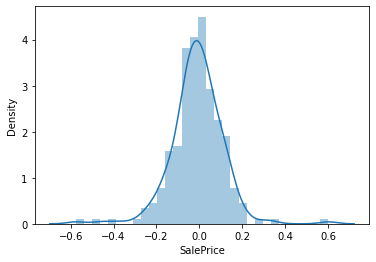

In [96]:
sns.distplot(y_test-y_pred)

<AxesSubplot:xlabel='SalePrice'>

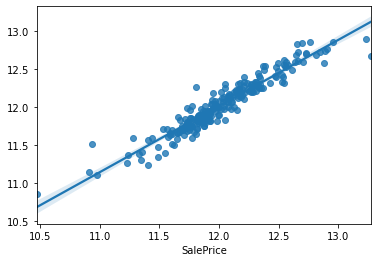

In [97]:
sns.regplot(y_test,y_pred)

# Saving the model

In [98]:
import pickle
pickle.dump(model,open('HousePrice.pkl','wb'))

In [105]:
original_values  = np.exp(np.array(y_test))
predicted_values = np.exp(np.array(model.predict(X_test)))
values = pd.DataFrame({'Original_values':original_values , 'predicted_values':predicted_values})
values

,Original_values,predicted_values
0,178001.0,190753.369551
1,176001.0,162056.813648
2,153501.0,178830.490683
3,123001.0,128918.590272
4,279501.0,224317.727924
5,151001.0,148689.184124
6,90001.0,105159.989800
7,122501.0,139358.408688
8,125001.0,126338.835437
9,204901.0,224557.356333


# Making Predictions

In [99]:
loaded_model=pickle.load(open('HousePrice.pkl','rb'))

In [102]:
np.exp(loaded_model.predict(df2[selected_feature]))

array([335598.32258009, 186207.2080597 , 244341.36943136, 180216.00038129,
       205490.74412701,  76836.36067243, 149264.66924532, 319199.35978614,
       224501.9873009 , 171472.01480892,  69413.63366219, 145149.28206181,
       132453.06844442, 182518.61315946, 271178.47250431, 118841.0218686 ,
       121161.60009926, 113830.45412482, 176012.05087599, 193494.81234458,
       159131.90533286, 136710.91155805, 145317.7281789 ,  53277.43959012,
        98289.51323883, 141006.74335638, 175720.44512362, 153099.60399096,
       162425.21604786,  76975.80239414, 147632.62585095, 180832.17198155,
       235980.38959276, 171156.69604129, 113607.29411881, 165137.01527803,
       192985.83890473, 106504.90018399, 160528.09422423, 146448.52569022,
       116165.83039286, 292888.36210275, 191112.58983462, 192596.33529696,
       134195.02570906, 132241.51344502, 123795.73231986, 101338.59951002,
       206888.36002302, 361907.99646843, 129577.98711175, 179480.86832856,
       103694.21260351, 1